In [10]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from passenger import *

# file = open('out_p1500e11f50cSimpleRevisedRouteController.bin', 'rb')

file = open('./simplecontroller_dump/out_p1500e11f50.bin', 'rb')

data = pickle.load(file)
passengers = data['passengers']
file.close


p_dict = [vars(passenger) for passenger in passengers]


p_dict[0]


{'weight': 95.72861889340082,
 'route': [0, 29, 0],
 'floor': 0,
 'route_index': 0,
 'state': <States.Waiting: 2>,
 'waitingTime': 33022,
 'rideTime': 0}

In [11]:
data = pd.DataFrame.from_records(p_dict)
data

,weight,route,floor,route_index,state,waitingTime,rideTime
0,95.728619,"[0, 29, 0]",0,0,States.Waiting,33022,0
1,117.621122,"[0, 42, 6, 2, 0]",0,0,States.Waiting,31493,0
2,86.082854,"[0, 45, 9, 0]",0,3,States.Idle,11618,1675
3,116.442896,"[0, 9, 36, 0]",0,3,States.Idle,27251,1054
4,58.098795,"[0, 11, 27, 14, 0]",0,4,States.Idle,16283,3272
...,...,...,...,...,...,...,...
1495,49.619487,"[0, 28, 41, 33, 7, 4, 0]",0,6,States.Idle,8069,3097
1496,52.336139,"[0, 48, 0]",0,2,States.Idle,113,411
1497,63.485566,"[0, 16, 35, 7, 17, 44, 0]",0,6,States.Idle,7640,1707
1498,41.751772,"[0, 17, 31, 16, 20, 19, 0]",0,6,States.Idle,9333,2719


<AxesSubplot:ylabel='Frequency'>

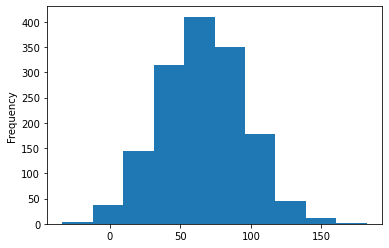

In [12]:
data['weight'].plot.hist(bins=10)

In [13]:
data['meanWait'] = data.waitingTime / data['route'].map(len)
data['meanTravel'] = data.rideTime / data['route'].map(len)
data

,weight,route,floor,route_index,state,waitingTime,rideTime,meanWait,meanTravel
0,95.728619,"[0, 29, 0]",0,0,States.Waiting,33022,0,11007.333333,0.000000
1,117.621122,"[0, 42, 6, 2, 0]",0,0,States.Waiting,31493,0,6298.600000,0.000000
2,86.082854,"[0, 45, 9, 0]",0,3,States.Idle,11618,1675,2904.500000,418.750000
3,116.442896,"[0, 9, 36, 0]",0,3,States.Idle,27251,1054,6812.750000,263.500000
4,58.098795,"[0, 11, 27, 14, 0]",0,4,States.Idle,16283,3272,3256.600000,654.400000
...,...,...,...,...,...,...,...,...,...
1495,49.619487,"[0, 28, 41, 33, 7, 4, 0]",0,6,States.Idle,8069,3097,1152.714286,442.428571
1496,52.336139,"[0, 48, 0]",0,2,States.Idle,113,411,37.666667,137.000000
1497,63.485566,"[0, 16, 35, 7, 17, 44, 0]",0,6,States.Idle,7640,1707,1091.428571,243.857143
1498,41.751772,"[0, 17, 31, 16, 20, 19, 0]",0,6,States.Idle,9333,2719,1333.285714,388.428571


<AxesSubplot:ylabel='Frequency'>

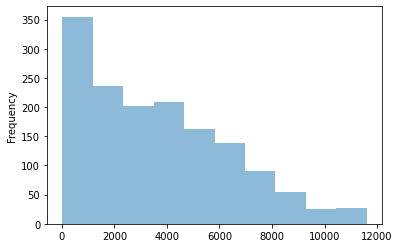

In [14]:
from cProfile import label


data.meanWait.plot.hist(alpha=0.5, bins=10)
# data.meanTravel.plot.hist(alpha=0.5)
# (data.meanWait + data.meanTravel).plot.hist(alpha=0.5, label="combined")
# plt.legend()

In [15]:
data.meanWait.describe()

count     1500.000000
mean      3656.908719
std       2692.227325
min         20.250000
25%       1286.075000
50%       3148.750000
75%       5424.985714
max      11607.666667
Name: meanWait, dtype: float64